# Introduction

1. [Dataset](https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients)

    This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from **April 2005** to **September 2005**. 

2. [Dataset Description](https://inseaddataanalytics.github.io/INSEADAnalytics/CourseSessions/ClassificationProcessCreditCardDefault.html?utm_source=chatgpt.com)

    There are 25 variables:

    * **ID**: ID of each client
    * **LIMIT_BAL**: Amount of given credit in NT dollars (includes individual and family/supplementary credit
    * **SEX**: Gender (1=male, 2=female)
    * **EDUCATION**: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
    * **MARRIAGE**: Marital status (1=married, 2=single, 3=others)
    * **AGE**: Age in years
    * **PAY_0**: Repayment status in September, 2005 (-2=no payment, -1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
    * **PAY_2 - PAY_6**: Repayment status in August, 2005 - April, 2005 (scale same as above)
    * **BILL_AMT1 - BILL_AMT6**: Amount of bill statement in September, 2005 - April, 2005 (NT dollar)
    * **PAY_AMT1 - PAY_AMT6**: Amount of previous payment in September, 2005 - in April, 2005 (NT dollar)
    * **default.payment.next.month**: Default payment (1=yes, 0=no)



1. Load packages

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

import gc
from datetime import datetime 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
import lightgbm as lgb
import xgboost as xgb

pd.set_option('display.max_columns', 100)

# Change the path to the dataset as needed
data_df = pd.read_csv(r"D:\新建文件夹\Default-of-Credit-Card-Clients-Dataset-Analisys-main\tabnet_application\default_of_credit_card_clients.csv")

2. Check the dataset's shape

In [108]:
print("Default Credit Card Clients data -  rows:",data_df.shape[0]," columns:", data_df.shape[1])

Default Credit Card Clients data -  rows: 30000  columns: 25


3. Look into more details to the data.

In [109]:
data_df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


From above cell's output we can see:
1. ID: There are 30,000 distinct credit card clients.  

2. LIMIT_BAL: The average value for the amount of credit card limit is 167,484. The standard deviation is unusually large, max value being 1M.

3. Education level is mostly graduate school and university.

4. Most of the clients are either marrined or single (less frequent the other status).

5. Average age is 35.5 years, with a standard deviation of 9.2.

6. As the value 0 for default payment means 'not default' and value 1 means 'default', the mean of 0.221 means that there are 22.1% of credit card contracts that will default next month (will verify this in the next sections of this analysis).


4. Renaming the target column for easier access

In [ ]:
rename_dict = {
    'default payment next month': 'default.payment.next.month'
}

data_df.rename(columns=rename_dict, inplace=True)
data_df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [111]:
print(data_df['default.payment.next.month'].value_counts())
print(data_df['EDUCATION'].value_counts())
print(data_df['MARRIAGE'].value_counts())

default.payment.next.month
0    23364
1     6636
Name: count, dtype: int64
EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64
MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64


5. Let's check if there is any missing data.

In [ ]:
total = data_df.isnull().sum().sort_values(ascending = False)
percent = (data_df.isnull().sum()/data_df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,ID,BILL_AMT2,PAY_AMT6,PAY_AMT5,PAY_AMT4,PAY_AMT3,PAY_AMT2,PAY_AMT1,BILL_AMT6,BILL_AMT5,BILL_AMT4,BILL_AMT3,BILL_AMT1,LIMIT_BAL,PAY_6,PAY_5,PAY_4,PAY_3,PAY_2,PAY_0,AGE,MARRIAGE,EDUCATION,SEX,default.payment.next.month
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


There is no missing data in the entire dataset.

6. Check data unbalance with respect with *target* value. (default.payment.next.month).

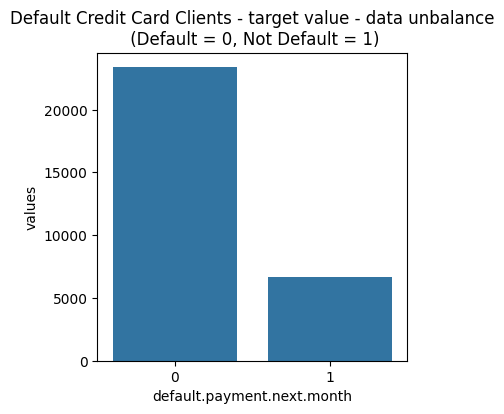

In [113]:
temp = data_df["default.payment.next.month"].value_counts()
df = pd.DataFrame({'default.payment.next.month': temp.index,'values': temp.values})
plt.figure(figsize = (4,4))
plt.title('Default Credit Card Clients - target value - data unbalance\n (Default = 0, Not Default = 1)')
sns.set_color_codes("pastel")
sns.barplot(x = 'default.payment.next.month', y="values", data=df)
locs, labels = plt.xticks()
plt.show()

A number of **6,636** out of **30,000** (or **22%**) of clients will default next month. The data has not a large unbalance with respect of the target value (default.payment.next.month).

# Data exploration

Amount of credit limit:

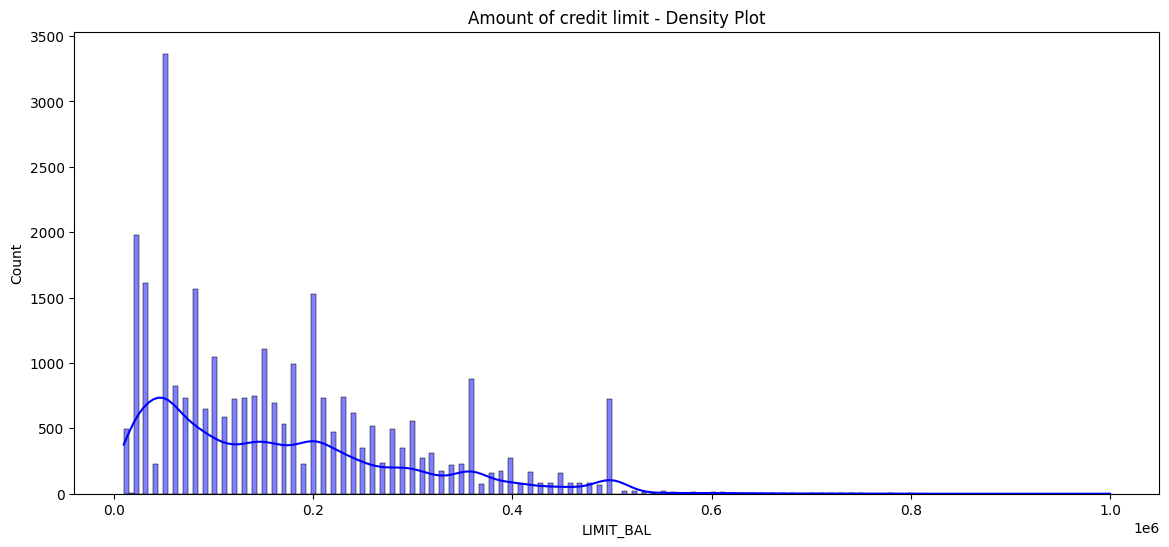

In [114]:
plt.figure(figsize = (14,6))
plt.title('Amount of credit limit - Density Plot')
sns.set_color_codes("pastel")
sns.histplot(data_df['LIMIT_BAL'],kde=True,bins=200, color="blue")
plt.show()

Largest group of amount of credit limit is apparently for amount of 50K. Let's verify this.

In [115]:
print(data_df['LIMIT_BAL'].value_counts().shape)
print(data_df['LIMIT_BAL'].value_counts().head(5))

(81,)
LIMIT_BAL
50000     3365
20000     1976
30000     1610
80000     1567
200000    1528
Name: count, dtype: int64


There are 81 distinct values for amount of credit limit.
Indeed, the largest number of credit cards are with limit of 50,000 (3365), followed by 20,000 (1976) and 30,000 (1610).

## 1. Let's visualize the density plot for amount of credit limit (LIMIT_BAL), grouped by default payment next month.

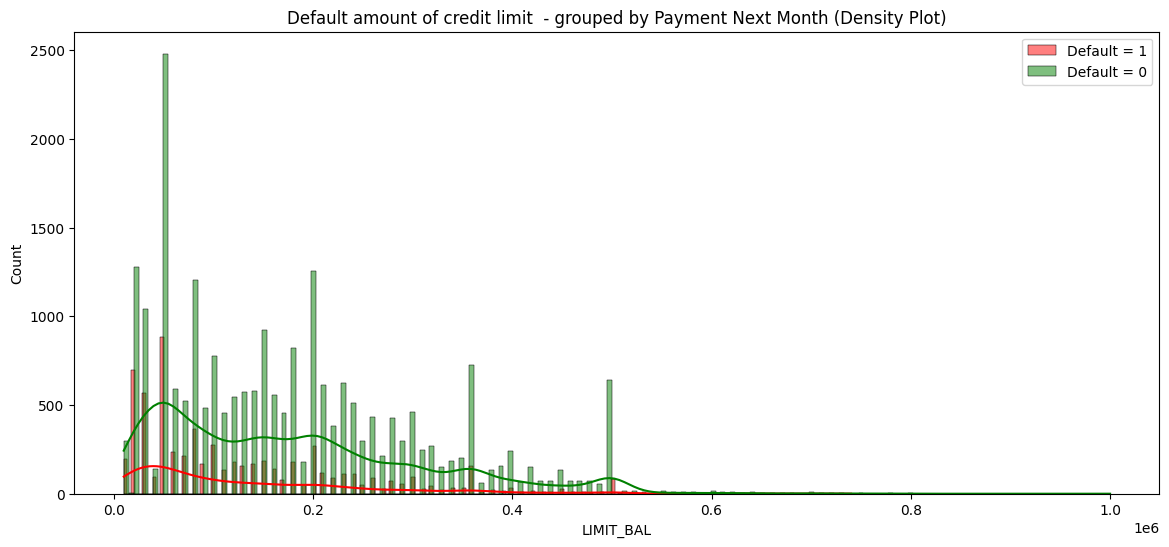

In [116]:
class_0 = data_df.loc[data_df['default.payment.next.month'] == 0]["LIMIT_BAL"]
class_1 = data_df.loc[data_df['default.payment.next.month'] == 1]["LIMIT_BAL"]
plt.figure(figsize = (14,6))
plt.title('Default amount of credit limit  - grouped by Payment Next Month (Density Plot)')
sns.set_color_codes("pastel")
sns.histplot(class_1,kde=True,bins=200, color="red", label="Default = 1")
sns.histplot(class_0,kde=True,bins=200, color="green", label="Default = 0")
plt.legend()
plt.show()

Most of defaults are for credit limits 0-100,000 (and density for this interval is larger for defaults than for non-defaults). Larger defaults number are for the amounts of **50,000**, **20,000** and **30,000**.


## 2.Let's check the credit limit distribution vs. sex. For the sex, 1 stands for male and 2 for female.

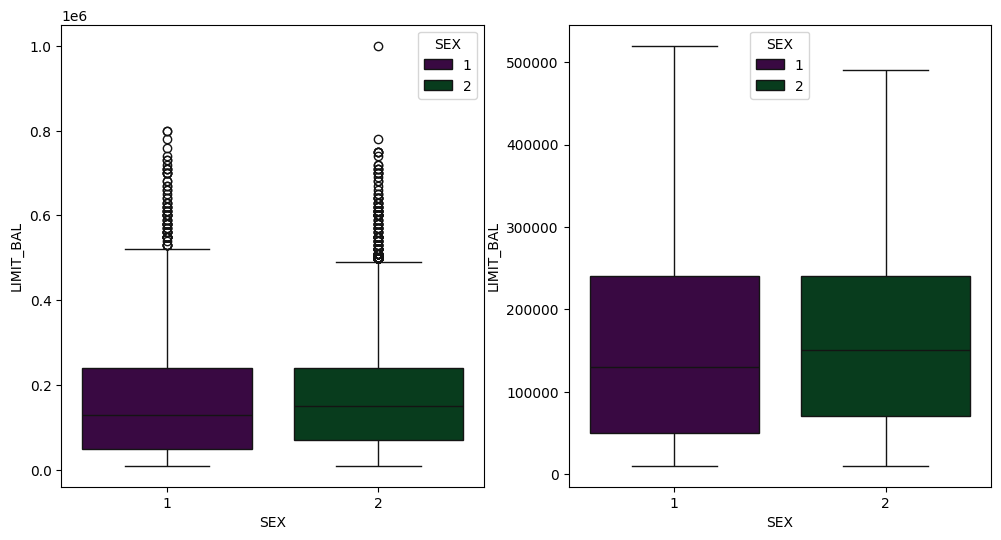

In [117]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="SEX", y="LIMIT_BAL", hue="SEX",data=data_df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="SEX", y="LIMIT_BAL", hue="SEX",data=data_df, palette="PRGn",showfliers=False)
plt.show();

The limit credit amount is quite balanced between sexes. The males have a slightly smaller Q2 and larger Q3 and Q4 and a lower mean. The female have a larger outlier max value (1M NT dollars).

## 3. Check the Features correlation


For the numeric values, let's represent the features correlation.


Let's check the correlation of Amount of bill statement in April - September 2005.

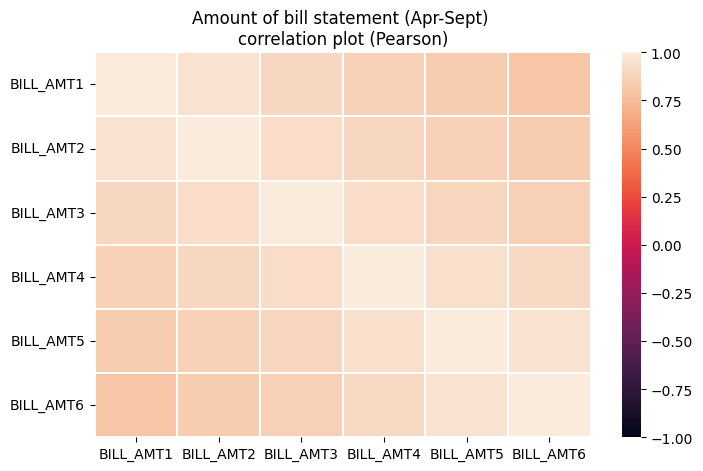

In [118]:
var = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']

plt.figure(figsize = (8,5))
plt.title('Amount of bill statement (Apr-Sept) \ncorrelation plot (Pearson)')
corr = data_df[var].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1)
plt.show()

Correlation is decreasing with distance between months. Lowest correlations are between Sept-April.


Let's check the correlation of Amount of previous payment in April - September 2005.

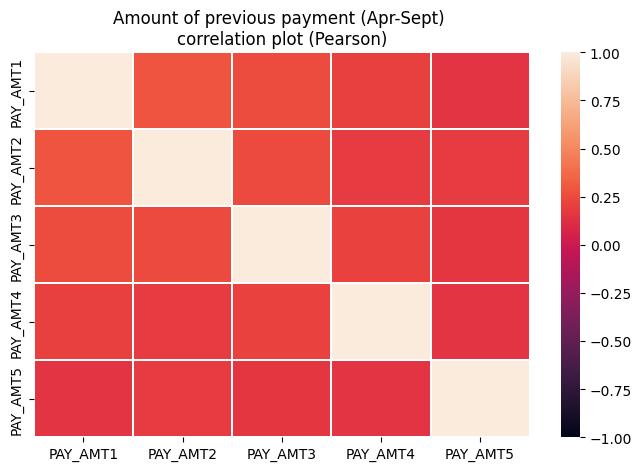

In [119]:
var = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5']

plt.figure(figsize = (8,5))
plt.title('Amount of previous payment (Apr-Sept) \ncorrelation plot (Pearson)')
corr = data_df[var].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1)
plt.show()

There are no correlations between amounts of previous payments for April-Sept 2005.

Let's check the correlation between Repayment status in April - September 2005.

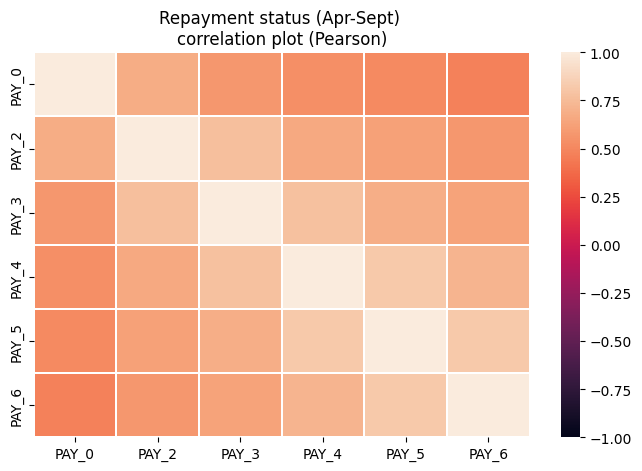

In [120]:
var = ['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

plt.figure(figsize = (8,5))
plt.title('Repayment status (Apr-Sept) \ncorrelation plot (Pearson)')
corr = data_df[var].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1)
plt.show()

Correlation is decreasing with distance between months. Lowest correlations are between Sept-April.


## 4.Sex, Education, Age and Marriage


Let's show sex, education, age and marriage distributions.

We start by showing the boxplots with age distribution grouped by marriage status and sex.

Marriage status meaning is:

* 0 : unknown (let's consider as others as well)
* 1 : married
* 2 : single
* 3 : others

Sex meaning is:

* 1 : male
* 2 : female


In [121]:
def boxplot_variation(feature1, feature2, feature3, width=16):
    fig, ax1 = plt.subplots(ncols=1, figsize=(width,6))
    s = sns.boxplot(ax = ax1, x=feature1, y=feature2, hue=feature3,
                data=data_df, palette="PRGn",showfliers=False)
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.show();

C:\Users\taro\AppData\Local\Temp\ipykernel_24120\194634451.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(),rotation=90)


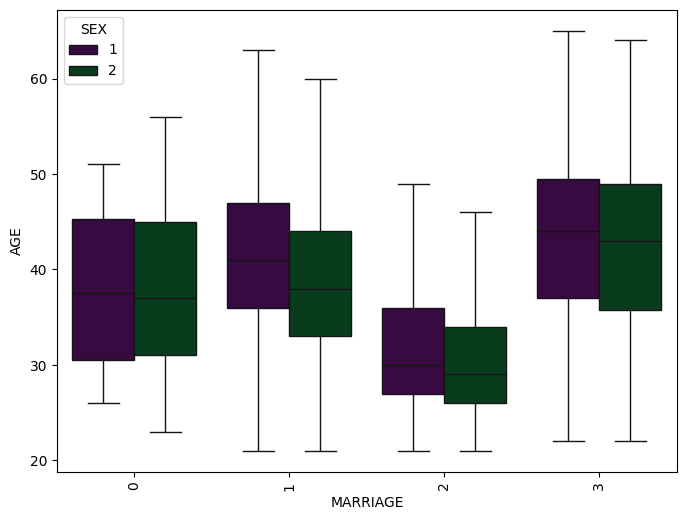

In [122]:
boxplot_variation('MARRIAGE','AGE', 'SEX',8)

It looks like Married status 3 (others), with mean values over 40 and Q4 values over 60 means mostly vidowed or divorced whilst Married status 0 could be not specified or divorced, as Q1 values are above values for married of both sexes.

Married males have mean age above married women. Unmarried males have mean value for age above unmarried women as well but closer. Q3 abd Q4 values for married man are above corresponding values for married women.


Let's show the boxplots with age distribution grouped by education and marriage.

Education status meaning is:

* 1 : graduate school
* 2 : university
* 3 : high school
* 4 : others
* 5 : unknown
* 6 : unknow


C:\Users\taro\AppData\Local\Temp\ipykernel_24120\194634451.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(),rotation=90)


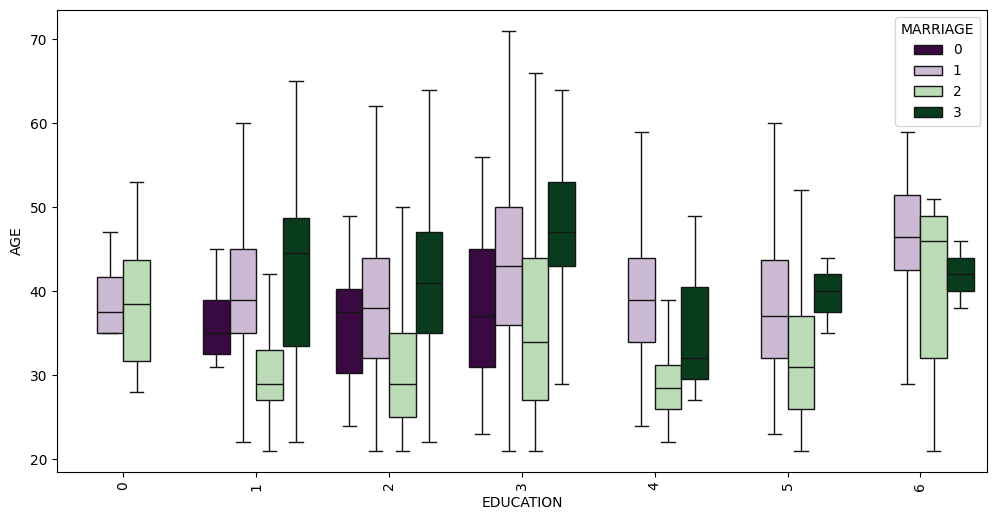

In [123]:
boxplot_variation('EDUCATION','AGE', 'MARRIAGE',12)

## Age, sex and credit amount limit


Let's show the  boxplots with credit amount limit distribution grouped by age and sex.



C:\Users\taro\AppData\Local\Temp\ipykernel_24120\194634451.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(),rotation=90)


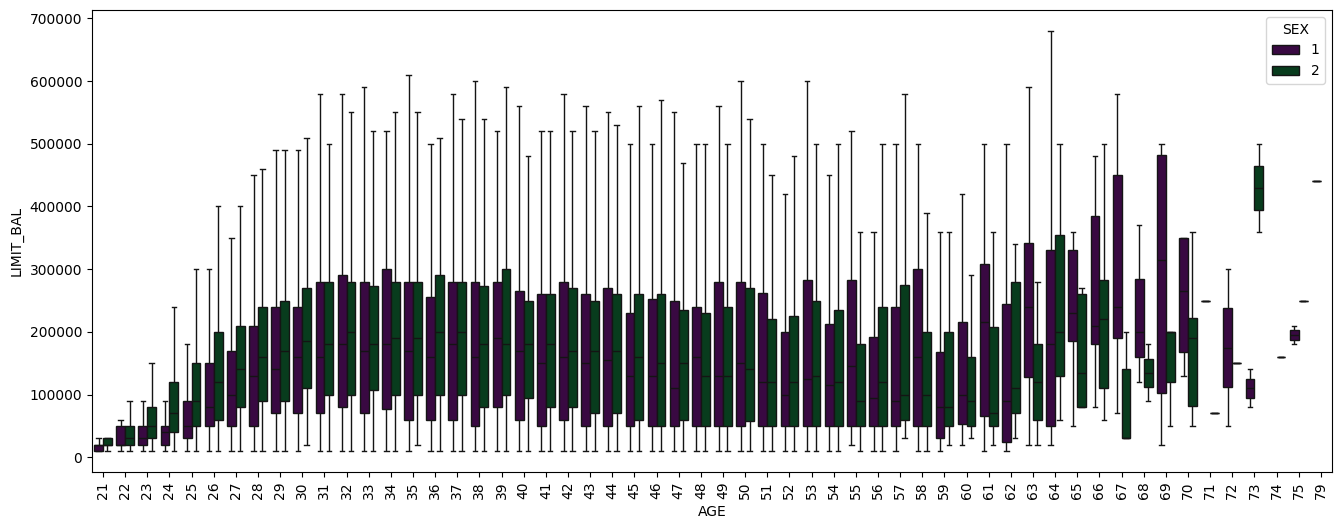

In [124]:
boxplot_variation('AGE','LIMIT_BAL', 'SEX',16)

Mean, Q3 and Q4 values are increasing for both male and female with age until aroung 35 years and then they are oscilating and get to a maximum of Q4 for males at age 64.

Mean values are generally smaller for males than for females, with few exceptions, for example at age 39, 48, until approximately 60, where mean values for males are generally larger than for females.



## 5. Marriage status, education level and credit amount limit


Let's show the  boxplots with credit amount limit distribution grouped by marriage status and education level.

C:\Users\taro\AppData\Local\Temp\ipykernel_24120\194634451.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(),rotation=90)


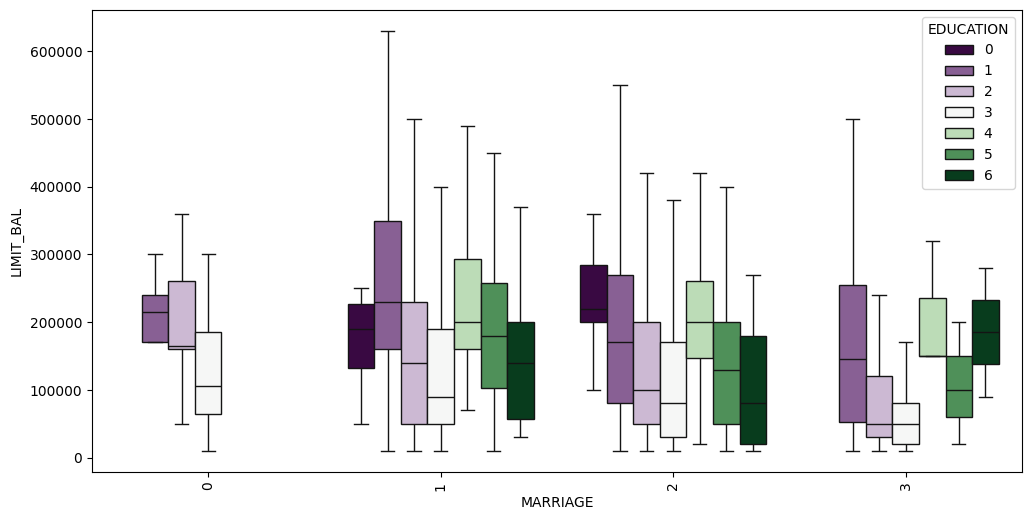

In [125]:
boxplot_variation('MARRIAGE','LIMIT_BAL', 'EDUCATION',12)
#EDUCATION: (1 = graduate school, 2 = university, 3 = high school, 0,4,5,6 = others)
#MARRIAGE: Marital status (0 = others, 1 = married, 2 = single, 3 = divorce)


# Predictive Modles


## 1. Define predictors and target values

Let's define the predictor features and the target features. Categorical features, if any, are also defined. In our case, there are no categorical feature.

In [126]:
target = 'default.payment.next.month'
predictors = [  'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 
                'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 
                'BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

## 2. Split data in train and validation set:

In [127]:
RFC_METRIC = 'gini'  #metric used for RandomForrestClassifier
NUM_ESTIMATORS = 100 #number of estimators used for RandomForrestClassifier
NO_JOBS = 4 #number of parallel jobs used for RandomForrestClassifier

#VALIDATION
VALID_SIZE = 0.20 # simple validation using train_test_split

#CROSS-VALIDATION
NUMBER_KFOLDS = 5 #number of KFolds for cross-validation

RANDOM_STATE = 2018

MAX_ROUNDS = 1000 #lgb iterations
EARLY_STOP = 50 #lgb early stop 
OPT_ROUNDS = 1000  #To be adjusted based on best validation rounds
VERBOSE_EVAL = 50 #Print out metric result

IS_LOCAL = False

In [128]:
# data_df = pd.read_csv(r"D:\新建文件夹\Default-of-Credit-Card-Clients-Dataset-Analisys-main\tabnet_application\default_of_credit_card_clients.csv")
train_df, val_df = train_test_split(data_df, test_size=VALID_SIZE, random_state=RANDOM_STATE, shuffle=True )

In [129]:
print("Total rows:", len(df))
print(train_df[target].value_counts())
print(val_df[target].value_counts())


Total rows: 2
default.payment.next.month
0    18656
1     5344
Name: count, dtype: int64
default.payment.next.month
0    4708
1    1292
Name: count, dtype: int64


In [130]:
# make copies of the train_df and val_df for later usage.
train_df_bkp = train_df.copy()
val_df_bkp = val_df.copy()

# a. RandomForestClassifier




## 1. Let's run a model using the training set for training. Then, we will use the validation set for validation. 

We will use as validation criterion 
1. **GINI**, which formula is **GINI = 2 * (AUC) - 1**, 
2. **AUC** is the **Receiver Operating Characteristic - Area Under Curve (ROC-AUC)**.  
Number of estimators is set to **100** and number of parallel jobs is set to **4**.

In [131]:
# Initializing the RandomForestClassifier.
clf = RandomForestClassifier(n_jobs=NO_JOBS, 
                             random_state=RANDOM_STATE,
                             criterion=RFC_METRIC,
                             n_estimators=NUM_ESTIMATORS,
                             verbose=False)

## 2. Train the RandomForestClassifier using the train_df data and fit function.

In [132]:
clf.fit(train_df[predictors], train_df[target].values)

RandomForestClassifier(n_jobs=4, random_state=2018, verbose=False)

Let's now predict the **target** values for the **val_df** data, using **predict** function.

In [133]:
preds = clf.predict(val_df[predictors])

## 3. Features importance

C:\Users\taro\AppData\Local\Temp\ipykernel_24120\499894721.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(),rotation=90)


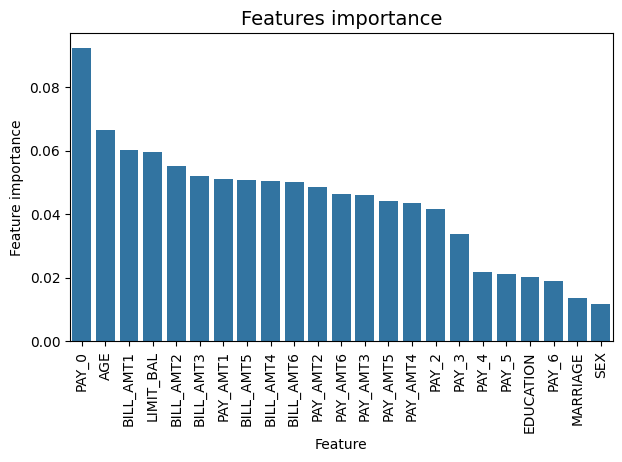

In [134]:
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   


The most important features are **PAY_0**, **AGE**, **BILL_AMT1**, **LIMIT_BAL**, **BILL_AMT2**, **BILL_AMT3**.


## 4. Confusion matrix

Let's show a confusion matrix for the results we obtained. 

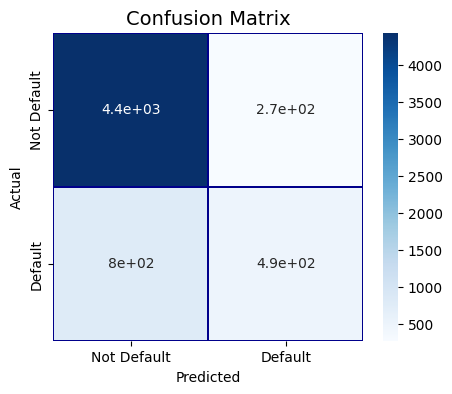

In [135]:
cm = pd.crosstab(val_df[target].values, preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,4))
sns.heatmap(cm, 
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

In [136]:
# AUC score
roc_auc_score(val_df[target].values, preds)

0.6625018741566295

The **ROC-AUC** score obtained with **RandomForrestClassifier** is **0.66**.


Let's use for RandomForrestClassifier **dummified variables** for the **categorical features**.


We start by defining the categorical features.


## 5. RandomForrest with OneHotEncoder

In [137]:
cat_features = ['EDUCATION', 'SEX', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

In [138]:
train_f_df = pd.get_dummies(train_df_bkp, columns = cat_features)
val_f_df = pd.get_dummies(val_df_bkp, columns = cat_features)

In [139]:
print("Default of Credit Card Clients train data -  rows:",train_f_df.shape[0]," columns:", train_f_df.shape[1])
print("Default of Credit Card Clients val  data -  rows:",val_f_df.shape[0]," columns:", val_f_df.shape[1])

Default of Credit Card Clients train data -  rows: 24000  columns: 93
Default of Credit Card Clients val  data -  rows: 6000  columns: 86


Because train and validation data does not have the same number of columns, we will align them.

In [140]:
train_fa_df, val_fa_df = train_f_df.align(val_f_df, join='outer', axis=1, fill_value=0)

Let's check again the data.

In [141]:
print("Default of Credit Card Clients train data -  rows:",train_fa_df.shape[0]," columns:", train_fa_df.shape[1])
print("Default of Credit Card Clients val  data -  rows:",val_fa_df.shape[0]," columns:", val_fa_df.shape[1])

Default of Credit Card Clients train data -  rows: 24000  columns: 93
Default of Credit Card Clients val  data -  rows: 6000  columns: 93


In [142]:
train_fa_df.head(5)
#PAY_0: Repayment status in September, 2005 (-2 = No consumption, -1 = paid in full, 0 = use of revolving credit (paid minimum only), 1 = payment delay for one month, 2 = payment delay for two months, ... 8 = payment delay for eight months, 9 = payment delay for nine months and above)

,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,EDUCATION_0,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,ID,LIMIT_BAL,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,PAY_0_-1,PAY_0_-2,PAY_0_0,PAY_0_1,PAY_0_2,PAY_0_3,PAY_0_4,PAY_0_5,PAY_0_6,PAY_0_7,PAY_0_8,PAY_2_-1,PAY_2_-2,PAY_2_0,PAY_2_1,PAY_2_2,PAY_2_3,PAY_2_4,PAY_2_5,PAY_2_6,PAY_2_7,PAY_2_8,PAY_3_-1,PAY_3_-2,PAY_3_0,PAY_3_1,PAY_3_2,PAY_3_3,PAY_3_4,PAY_3_5,PAY_3_6,PAY_3_7,PAY_3_8,PAY_4_-1,PAY_4_-2,PAY_4_0,PAY_4_1,PAY_4_2,PAY_4_3,PAY_4_4,PAY_4_5,PAY_4_6,PAY_4_7,PAY_4_8,PAY_5_-1,PAY_5_-2,PAY_5_0,PAY_5_2,PAY_5_3,PAY_5_4,PAY_5_5,PAY_5_6,PAY_5_7,PAY_5_8,PAY_6_-1,PAY_6_-2,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_1,SEX_2,default.payment.next.month
22659,48,175095,175522,173918,174074,178671,178869,False,False,False,True,False,False,False,22660,150000,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,10011,6200,5874,10000,6054,7108,False,True,0
6618,37,8788,40927,28306,31578,21195,11776,False,False,True,False,False,False,False,6619,180000,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,40970,1210,10015,10009,11783,110306,True,False,0
26605,23,2400,2400,2400,2400,2400,1800,False,False,True,False,False,False,False,26606,20000,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,0,0,0,0,0,0,True,False,1
2504,30,440,30404,0,880,150,430,False,False,True,False,False,False,False,2505,180000,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,30404,0,880,150,430,747,True,False,0
1111,44,3424,155,1922,1473,1865,835,False,False,False,True,False,False,False,1112,50000,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,155,1922,1473,1865,835,1833,False,True,0


In [143]:
val_fa_df.head(5)

,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,EDUCATION_0,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,ID,LIMIT_BAL,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,PAY_0_-1,PAY_0_-2,PAY_0_0,PAY_0_1,PAY_0_2,PAY_0_3,PAY_0_4,PAY_0_5,PAY_0_6,PAY_0_7,PAY_0_8,PAY_2_-1,PAY_2_-2,PAY_2_0,PAY_2_1,PAY_2_2,PAY_2_3,PAY_2_4,PAY_2_5,PAY_2_6,PAY_2_7,PAY_2_8,PAY_3_-1,PAY_3_-2,PAY_3_0,PAY_3_1,PAY_3_2,PAY_3_3,PAY_3_4,PAY_3_5,PAY_3_6,PAY_3_7,PAY_3_8,PAY_4_-1,PAY_4_-2,PAY_4_0,PAY_4_1,PAY_4_2,PAY_4_3,PAY_4_4,PAY_4_5,PAY_4_6,PAY_4_7,PAY_4_8,PAY_5_-1,PAY_5_-2,PAY_5_0,PAY_5_2,PAY_5_3,PAY_5_4,PAY_5_5,PAY_5_6,PAY_5_7,PAY_5_8,PAY_6_-1,PAY_6_-2,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_1,SEX_2,default.payment.next.month
8343,30,37522,38614,39671,40213,41064,43382,False,False,True,False,False,False,False,8344,50000,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,0,False,False,True,0,False,False,False,False,False,False,0,False,False,True,0,False,False,False,False,False,False,0,False,False,True,False,False,False,False,False,False,0,False,False,True,False,False,False,False,False,False,0,2000,2000,1500,1500,3000,2000,False,True,0
2228,29,53274,54093,53111,50568,47791,45421,False,False,True,False,False,False,False,2229,60000,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,0,False,False,True,0,False,False,False,False,False,False,0,False,False,True,0,False,False,False,False,False,False,0,False,False,True,False,False,False,False,False,False,0,False,False,True,False,False,False,False,False,False,0,2591,2109,1705,2010,2000,1523,False,True,0
6293,55,2326,4917,4906,4707,2254,5375,False,True,False,False,False,False,False,6294,280000,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,0,False,False,True,0,False,False,False,False,False,False,0,False,False,True,0,False,False,False,False,False,False,0,False,False,False,True,False,False,False,False,False,0,True,False,False,False,False,False,False,False,False,0,4917,2453,2254,0,5375,1165,True,False,0
16805,43,4166,4166,4216,4166,4166,4166,False,False,False,True,False,False,False,16806,50000,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,0,True,False,False,0,False,False,False,False,False,False,0,False,False,True,0,False,False,False,False,False,False,0,True,False,False,False,False,False,False,False,False,0,True,False,False,False,False,False,False,False,False,0,4166,4216,4116,4166,4166,4166,True,False,0
3519,34,383973,380082,389694,342198,344808,347188,False,False,True,False,False,False,False,3520,550000,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,0,False,False,True,0,False,False,False,False,False,False,0,False,False,True,0,False,False,False,False,False,False,0,False,False,True,False,False,False,False,False,False,0,False,False,True,False,False,False,False,False,False,0,15000,20000,20000,12000,12000,13000,False,True,0


Let's define the target and predictors lists.

In [144]:
target_f = 'default.payment.next.month'
predictors_f = ['AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'EDUCATION_0', 'EDUCATION_1',
       'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4', 'EDUCATION_5',
       'EDUCATION_6', 'LIMIT_BAL', 'MARRIAGE_0', 'MARRIAGE_1',
       'MARRIAGE_2', 'MARRIAGE_3', 'PAY_0_-1', 'PAY_0_-2', 'PAY_0_0',
       'PAY_0_1', 'PAY_0_2', 'PAY_0_3', 'PAY_0_4', 'PAY_0_5', 'PAY_0_6',
       'PAY_0_7', 'PAY_0_8', 'PAY_2_-1', 'PAY_2_-2', 'PAY_2_0', 'PAY_2_1',
       'PAY_2_2', 'PAY_2_3', 'PAY_2_4', 'PAY_2_5', 'PAY_2_6', 'PAY_2_7',
       'PAY_2_8', 'PAY_3_-1', 'PAY_3_-2', 'PAY_3_0', 'PAY_3_1', 'PAY_3_2',
       'PAY_3_3', 'PAY_3_4', 'PAY_3_5', 'PAY_3_6', 'PAY_3_7', 'PAY_3_8',
       'PAY_4_-1', 'PAY_4_-2', 'PAY_4_0', 'PAY_4_1', 'PAY_4_2', 'PAY_4_3',
       'PAY_4_4', 'PAY_4_5', 'PAY_4_6', 'PAY_4_7', 'PAY_4_8', 'PAY_5_-1',
       'PAY_5_-2', 'PAY_5_0', 'PAY_5_2', 'PAY_5_3', 'PAY_5_4', 'PAY_5_5',
       'PAY_5_6', 'PAY_5_7', 'PAY_5_8', 'PAY_6_-1', 'PAY_6_-2', 'PAY_6_0',
       'PAY_6_2', 'PAY_6_3', 'PAY_6_4', 'PAY_6_5', 'PAY_6_6', 'PAY_6_7',
       'PAY_6_8', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4',
       'PAY_AMT5', 'PAY_AMT6', 'SEX_1', 'SEX_2']

Let's train the **RandonForestClassifier** using the **train_fa_df** data and **fit** function.

In [145]:
clf.fit(train_fa_df[predictors_f], train_df[target_f].values)

RandomForestClassifier(n_jobs=4, random_state=2018, verbose=False)

Let's now predict the **target** values for the **val_df** data, using **predict** function.

In [146]:
preds = clf.predict(val_fa_df[predictors_f])

Let's also visualize the features importance. 

## 6. Features importance

C:\Users\taro\AppData\Local\Temp\ipykernel_24120\1771139333.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(),rotation=90)


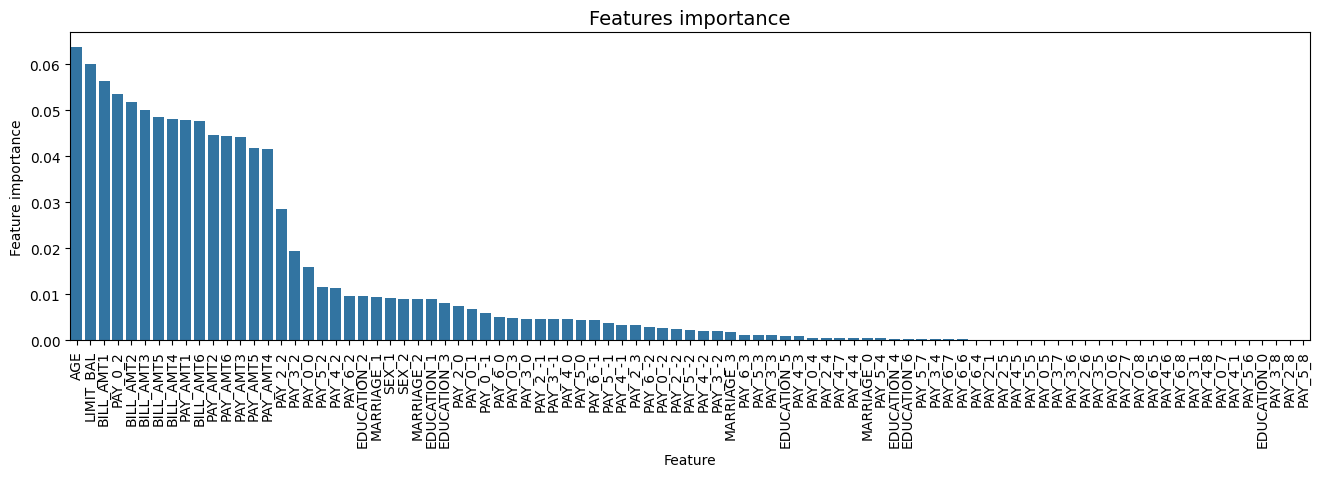

In [147]:
tmp = pd.DataFrame({'Feature': predictors_f, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (16,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

The most important features are **AGE**, **LIMIT_BAL**, **BILL_AMT1**, **PAY_0_2**, **BILL_AMT2**, **BILL_AMT3**.

## 7. Confusion matrix

Let's show a confusion matrix for the results we obtained. 

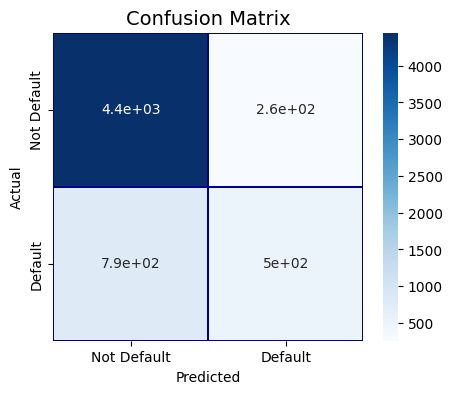

In [148]:
cm = pd.crosstab(val_fa_df[target].values, preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,4))
sns.heatmap(cm, 
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

We also calculate area under curve (receiver operator characteristic)

In [149]:
roc_auc_score(val_fa_df[target].values, preds)

0.6667660736878931

With the dummified features, the improvement of the AUC score is quite small.

# b. AdaBoostClassifier
AdaBoostClassifier stands for Adaptive Boosting Classifier <a href='#8'>[5]</a>.



## 1. Prepare the model

Set the parameters for the model and initialize the model.

In [150]:
clf = AdaBoostClassifier(random_state=RANDOM_STATE,
                         algorithm='SAMME',
                         learning_rate=0.8,
                             n_estimators=NUM_ESTIMATORS)

## 2. Fit the model

Let's fit the model.

In [151]:
clf.fit(train_df[predictors], train_df[target].values)

e:\python3.10.9\lib\site-packages\sklearn\ensemble\_weight_boosting.py:514: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


AdaBoostClassifier(algorithm='SAMME', learning_rate=0.8, n_estimators=100,
                   random_state=2018)

## 3. Predict the target values

Let's now predict the **target** values for the **val_df** data, using predict function.

In [152]:
preds = clf.predict(val_df[predictors])

## 4. Features importance

Let's see also the features importance.

C:\Users\taro\AppData\Local\Temp\ipykernel_24120\3992975389.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(),rotation=90)


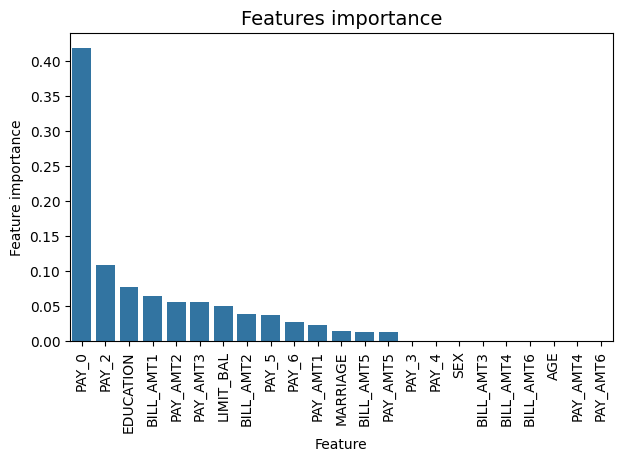

In [153]:
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   

## 5. Confusion matrix

Let's visualize the confusion matrix.

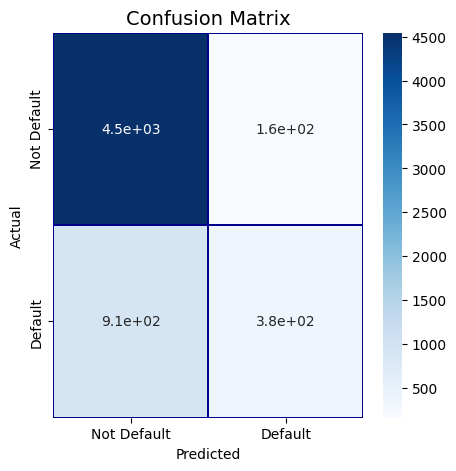

In [154]:
cm = pd.crosstab(val_df[target].values, preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

Let's calculate also the ROC-AUC.


## 6. Area under curve

In [155]:
roc_auc_score(val_df[target].values, preds)

0.6315766457725602

The ROC-AUC score obtained with AdaBoostClassifier is 0.65.

# c. CatBoostClassifier


CatBoostClassifier is a gradient boosting for decision trees algorithm with support for handling categorical data.


In [156]:
clf = CatBoostClassifier(iterations=500,
                             learning_rate=0.02,
                             depth=12,
                             eval_metric='AUC',
                             random_seed = RANDOM_STATE,
                             bagging_temperature = 0.2,
                             od_type='Iter',
                             metric_period = VERBOSE_EVAL,
                             od_wait=100)

In [157]:
clf.fit(train_df[predictors], train_df[target].values,verbose=True)

0:	total: 81.8ms	remaining: 40.8s
50:	total: 4.01s	remaining: 35.3s
100:	total: 7.95s	remaining: 31.4s
150:	total: 12s	remaining: 27.8s
200:	total: 16s	remaining: 23.9s
250:	total: 20s	remaining: 19.8s
300:	total: 24.1s	remaining: 15.9s
350:	total: 28s	remaining: 11.9s
400:	total: 32s	remaining: 7.91s
450:	total: 36.1s	remaining: 3.92s
499:	total: 39.9s	remaining: 0us


## 2. Predict the target values

Let's now predict the **target** values for the **val_df** data, using predict function.

In [158]:
preds = clf.predict(val_df[predictors])

## 3. Features importance

Let's see also the features importance.

C:\Users\taro\AppData\Local\Temp\ipykernel_24120\3992975389.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(),rotation=90)


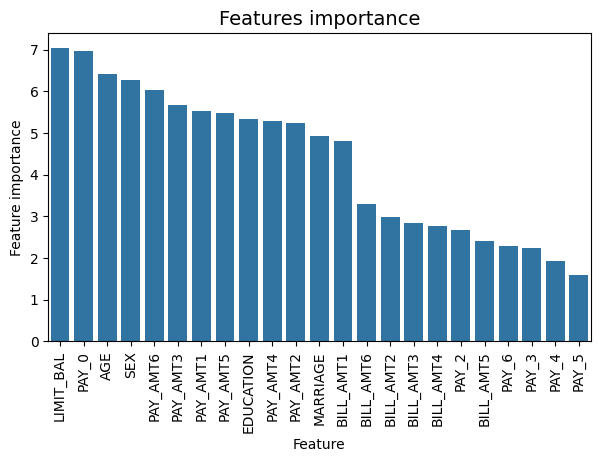

In [159]:
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   

## 4. Confusion matrix

Let's visualize the confusion matrix.

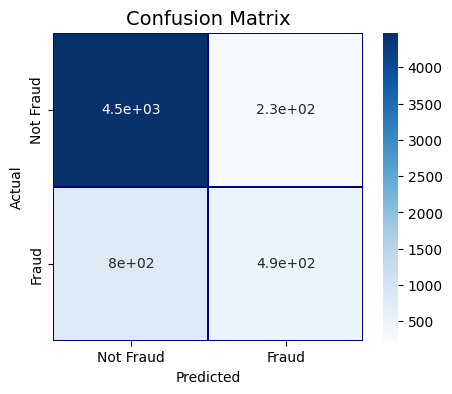

In [160]:
cm = pd.crosstab(val_df[target].values, preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,4))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

Let's calculate also the ROC-AUC.


## 5. Area under curve

In [161]:
roc_auc_score(val_df[target].values, preds)

0.6640409841886941

The ROC-AUC score obtained with CatBoostClassifier is 0.66.

# d. XGBoost

## 1. Prepare the model

We initialize the DMatrix objects for training and validation, starting from the datasets. We also set some of the parameters used for the model tuning.

In [162]:
rename_dict = {
    'default payment next month' : 'default.payment.next.month'
}
data_df.rename_axis(columns=rename_dict, inplace=True)

In [163]:
data_df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [164]:
train_df, val_df = train_test_split(data_df, test_size=VALID_SIZE, random_state=RANDOM_STATE, shuffle=True)


target = 'default.payment.next.month'
predictors = [  'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 
                'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 
                'BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [165]:
# Prepare the train and valid datasets
dtrain = xgb.DMatrix(train_df[predictors], train_df[target].values)
dvalid = xgb.DMatrix(val_df[predictors], val_df[target].values)

#What to monitor (in this case, **train** and **valid**)
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

# Set xgboost parameters
params = {}
params['objective'] = 'binary:logistic'
params['eta'] = 0.039
params['silent'] = True
params['max_depth'] = 2
params['subsample'] = 0.8
params['colsample_bytree'] = 0.9
params['eval_metric'] = 'auc'
params['random_state'] = RANDOM_STATE

## 2. Train the model

In [166]:
model = xgb.train(params, 
                dtrain, 
                MAX_ROUNDS, 
                watchlist, 
                early_stopping_rounds=EARLY_STOP, 
                maximize=True, 
                verbose_eval=VERBOSE_EVAL)

[0]	train-auc:0.69228	valid-auc:0.69764
[50]	train-auc:0.76986	valid-auc:0.76557


e:\python3.10.9\lib\site-packages\xgboost\core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
e:\python3.10.9\lib\site-packages\xgboost\callback.py:386: UserWarning: [14:37:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "silent" } are not used.

  self.starting_round = model.num_boosted_rounds()


[100]	train-auc:0.77820	valid-auc:0.77358
[150]	train-auc:0.78298	valid-auc:0.77706
[200]	train-auc:0.78654	valid-auc:0.77900
[250]	train-auc:0.78910	valid-auc:0.78023
[300]	train-auc:0.79128	valid-auc:0.78107
[350]	train-auc:0.79319	valid-auc:0.78196
[400]	train-auc:0.79503	valid-auc:0.78277
[450]	train-auc:0.79660	valid-auc:0.78317
[500]	train-auc:0.79821	valid-auc:0.78341
[550]	train-auc:0.79976	valid-auc:0.78351
[600]	train-auc:0.80086	valid-auc:0.78380
[650]	train-auc:0.80209	valid-auc:0.78388
[700]	train-auc:0.80322	valid-auc:0.78410
[735]	train-auc:0.80410	valid-auc:0.78384


The best validation score (ROC-AUC) was **0.78**, for round **453**.

## 3. Plot variable importance

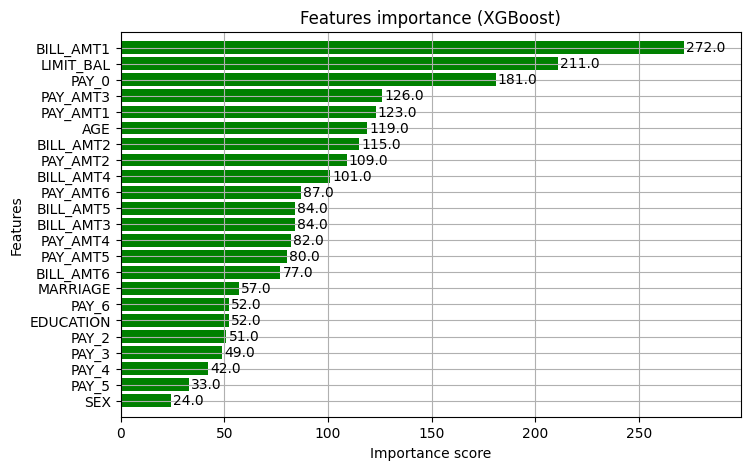

In [167]:
fig, (ax) = plt.subplots(ncols=1, figsize=(8,5))
xgb.plot_importance(model, height=0.8, title="Features importance (XGBoost)", ax=ax, color="green") 
plt.show()

C:\Users\taro\AppData\Local\Temp\ipykernel_24120\3762353704.py:14: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, features=X_train, feature_names=predictors)


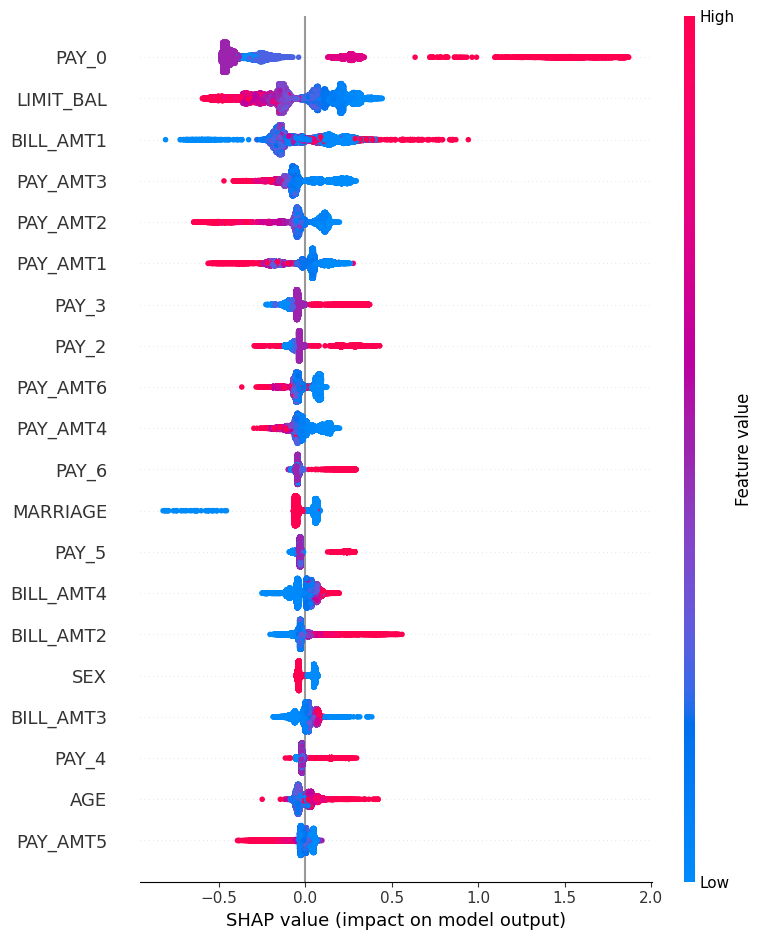

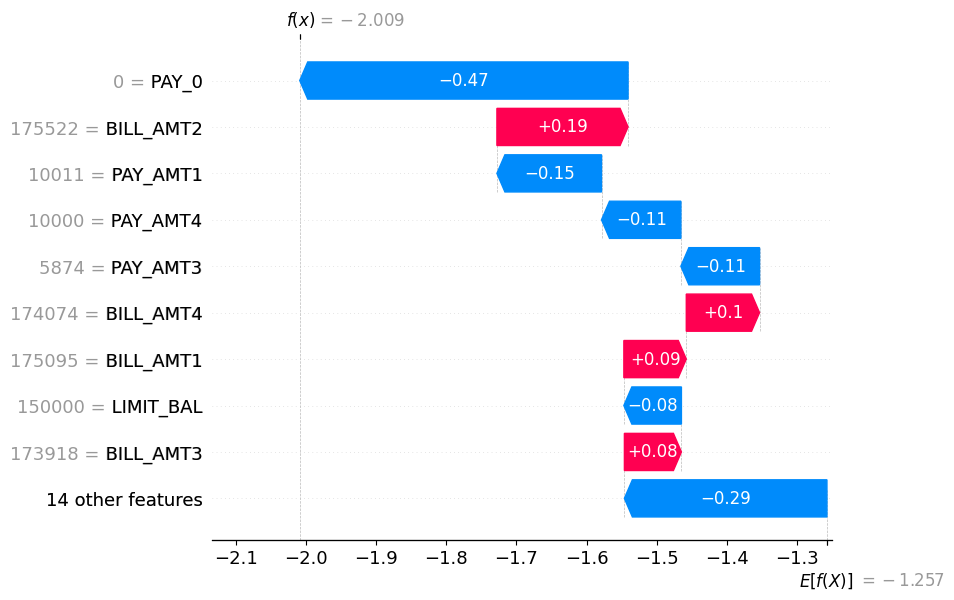

In [169]:
import shap

X_train = train_df[predictors]            
explainer = shap.TreeExplainer(model)     
shap_values = explainer.shap_values(X_train)   # shape: [n_samples, n_features]

# Visualization
shap.initjs()

i = 0
shap.force_plot(explainer.expected_value, shap_values[i, :], X_train.iloc[i, :])

# summary plot
shap.summary_plot(shap_values, features=X_train, feature_names=predictors)

# single sample waterfall
exp = shap.Explanation(
    values=shap_values[i],
    base_values=explainer.expected_value,
    data=X_train.iloc[i].values,
    feature_names=predictors
)
shap.waterfall_plot(exp)

# e. LightGBM

Let's continue with another gradient boosting algorithm, LightGBM.


## 1. Define model parameters

In [171]:
import lightgbm as lgb
params = {
          'boosting_type': 'gbdt',
          'objective': 'binary',
          'metric':'auc',
          'learning_rate': 0.05,
          'num_leaves': 7,  # we should let it be smaller than 2^(max_depth)
          'max_depth': 4,  # -1 means no limit
          'min_child_samples': 100,  # Minimum number of data need in a child(min_data_in_leaf)
          'max_bin': 100,  # Number of bucketed bin for feature values
          'subsample': 0.9,  # Subsample ratio of the training instance.
          'subsample_freq': 1,  # frequence of subsample, <=0 means no enable
          'colsample_bytree': 0.7,  # Subsample ratio of columns when constructing each tree.
          'min_child_weight': 0,  # Minimum sum of instance weight(hessian) needed in a child(leaf)
          'min_split_gain': 0,  # lambda_l1, lambda_l2 and min_gain_to_split to regularization
          'nthread': 8,
          'verbose': 0,
          'scale_pos_weight':50, # because training data is sightly unbalanced 
         }

## 2. Define the categorical features.

In [172]:
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE','PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

## 3. Prepare the model, creating the **Dataset**s data structures from the train and validation sets.

We will also initialize the Datasets with the list of the categorical features (**lgb** has a special treatment for categorical values).

In [173]:
dtrain = lgb.Dataset(train_df[predictors].values, 
                     label=train_df[target].values,
                     feature_name=predictors,
                     categorical_feature=categorical_features)

dvalid = lgb.Dataset(val_df[predictors].values,
                     label=val_df[target].values,
                     feature_name=predictors,
                     categorical_feature=categorical_features)

## 4. Let's run the model, using the **train** function.

In [174]:
import gc
import lightgbm as lgb

evals_result = {}
model = lgb.train(params,
                  dtrain,
                  num_boost_round=100,  # Replace 100 with your desired number of rounds
                  valid_sets=[dvalid],  # Use validation set for monitoring
                  valid_names=['valid'],
)

del dvalid
gc.collect()

[LightGBM] [Warning] Met negative value in categorical features, will convert it to NaN
[LightGBM] [Warning] Met negative value in categorical features, will convert it to NaN
[LightGBM] [Warning] Met negative value in categorical features, will convert it to NaN
[LightGBM] [Warning] Met negative value in categorical features, will convert it to NaN
[LightGBM] [Warning] Met negative value in categorical features, will convert it to NaN
[LightGBM] [Warning] Met negative value in categorical features, will convert it to NaN


132683

Plot variable importance.

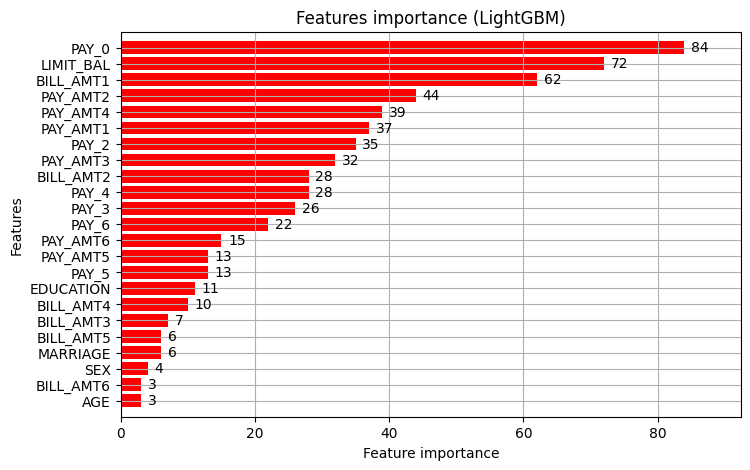

In [175]:
fig, (ax) = plt.subplots(ncols=1, figsize=(8,5))
lgb.plot_importance(model, height=0.8, title="Features importance (LightGBM)", ax=ax,color="red") 
plt.show()

## 5. Training and validation using cross-validation

Let's use now cross-validation. We will use cross-validation (KFolds) with 5 folds. Data is divided in 5 folds and, by rotation, we are training using 4 folds (n-1) and validate using the 5th (nth) fold.

In [176]:
kf = KFold(n_splits = NUMBER_KFOLDS, random_state = RANDOM_STATE, shuffle = True)
for train_index, test_index in kf.split(data_df):
    train_X, valid_X = data_df.iloc[train_index], data_df.iloc[test_index]

    dtrain = lgb.Dataset(train_X[predictors].values, label=train_X[target].values,
                     feature_name=predictors)

    dvalid = lgb.Dataset(valid_X[predictors].values, label=valid_X[target].values,
                     feature_name=predictors)

    evals_results = {}
    model =  lgb.train(params, 
                  dtrain, 
                  valid_sets=[dtrain, dvalid], 
                  valid_names=['train','valid'], 

                  feval=None)

In [177]:
y_true = valid_X[target].values  # True labels from validation set
y_pred = model.predict(valid_X[predictors].values)  # Predicted probabilities

# Calculate and print AUC score
auc_score = roc_auc_score(y_true, y_pred)
print(f"AUC Score: {auc_score:.4f}")

AUC Score: 0.7804


The average validation **AUC** for the 5 folds obtained was **0.78**, with values between **0.778** and **0.79**.

# Tree models conclusion

We investigated the data, checking for data unbalancing, visualizing the features and understanding the relationship between different features.   

We then investigated five predictive models:  
* We started with **RandomForrestClassifier**, for which we obtained an AUC scode of **0.66**. 
   For the **RandomForrestClassifier** we also experimented with **OneHotEncoder**, replacing the categorical features with dummified values (introducing one dummy variable for each category). The AUC score did not improved significantly in this case.
* Next we used  an **AdaBoostClassifier** model, with lower AUC score (**0.63**).   
* We followed with an **CatBoostClassifier** model, with lower AUC score (**0.66**).   
* Then we experimented with a **XGBoost** model, for which the AUC score obtained was **0.77**.   
* We then presented the data to a **LightGBM** model. We used both train-validation split and cross-validation to evaluate the model effectiveness to predict the target value, i.e. detecting if a credit card client  will default next month. With both methods for LightGBM the obtained values of AUC for the validation set were around **0.78**.

# f. Tabnet Neural Network

## 1. Loads packages

In [178]:
import os, sys, numpy as np, pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, average_precision_score, roc_curve
import torch
from pytorch_tabnet.tab_model import TabNetClassifier
from pytorch_tabnet.metrics import Metric
np.random.seed(42)
torch.manual_seed(42)
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
os.environ['TORCH_USE_CUDA_DSA'] = "1"
# print("PyTorch:", torch.__version__)


## 2. Loads data and check target colum

In [179]:

data_path = r"D:\新建文件夹\Default-of-Credit-Card-Clients-Dataset-Analisys-main\tabnet_application\default_of_credit_card_clients.csv"

df = pd.read_csv(data_path)

df.columns = df.columns.str.strip().str.replace(r"\s+", " ", regex=True)

aliases = [
    "default payment next month",      
    "default_payment_next_month",      
    "DEFAULT",                         
    "default"                          
]
tgt = None
for name in aliases:
    if name in df.columns:
        tgt = name
        break
if tgt is None:
    print(df.columns.tolist())
    raise ValueError("Did not find target column, please add actual column name in aliases")
df = df.rename(columns={tgt: "target"})
assert "target" in df.columns

print("Rows, Cols:", df.shape)
df.head(3)


Rows, Cols: (30000, 25)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,target
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


## 3. Data cleaning and future preparation

In [180]:

df = df.replace([np.inf, -np.inf], np.nan).fillna(0)

y = df["target"].astype(int).values

if not set(np.unique(y)).issubset({0,1}):
    y = (y > 0).astype(int)
assert set(np.unique(y)).issubset({0,1})

# delete non-feature columns
drop_cols = [c for c in ["ID", "target"] if c in df.columns]
X_df = df.drop(columns=drop_cols).copy()

print("Label distribution:", pd.Series(y).value_counts().to_dict())
X_df.head(3)


Label distribution: {0: 23364, 1: 6636}


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000


## 4. Detect and encode categorical features

In [181]:
categorical_cols = []
for col in X_df.columns:
    if str(X_df[col].dtype)[:3] in ['int','Int'] and X_df[col].nunique() <= 50:
        categorical_cols.append(col)

cat_idxs, cat_dims = [], []
for i, col in enumerate(X_df.columns):
    if col in categorical_cols:

        X_df[col] = X_df[col].astype(int)
        minv = int(X_df[col].min())
        if minv < 0:
            X_df[col] = X_df[col] - minv

        uniq = np.sort(X_df[col].unique())
        mapping = {v:i for i,v in enumerate(uniq)}
        X_df[col] = X_df[col].map(mapping).astype(int)
        cat_idxs.append(i)
        cat_dims.append(int(X_df[col].nunique()))

print("Categorical columns:", categorical_cols[:10], "... total:", len(categorical_cols))
print("cat_idxs len:", len(cat_idxs), " cat_dims len:", len(cat_dims))


Categorical columns: ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'] ... total: 9
cat_idxs len: 9  cat_dims len: 9


In [182]:

num_cols = [c for c in X_df.columns if c not in categorical_cols]
scaler = StandardScaler()
if len(num_cols) > 0:
    X_df[num_cols] = scaler.fit_transform(X_df[num_cols])

X = X_df.values
assert np.isfinite(X).all(), "X contains NaN/Inf"

X.shape, len(num_cols), len(categorical_cols)


((30000, 23), 14, 9)

## 5. Train-validation test split

In [183]:
from math import ceil

def safe_stratified_split(X, y, test_size, seed):
    counts = pd.Series(y).value_counts()

    can_stratify = (counts.min() >= 2)
    if can_stratify:
        return train_test_split(X, y, test_size=test_size, stratify=y, random_state=seed)
    else:
        print("Warn: cannot stratify (min class too small), fallback to non-stratified split")
        return train_test_split(X, y, test_size=test_size, random_state=seed)

X_train, X_temp, y_train, y_temp = safe_stratified_split(X, y, test_size=0.20, seed=42)
X_valid, X_test, y_valid, y_test = safe_stratified_split(X_temp, y_temp, test_size=0.20, seed=42)

for name, yy in [('train', y_train), ('valid', y_valid), ('test', y_test)]:
    print(name, pd.Series(yy).value_counts().to_dict())


train {0: 18691, 1: 5309}
valid {0: 3738, 1: 1062}
test {0: 935, 1: 265}


In [184]:
class Gini(Metric):
    def __init__(self):
        self._name = "gini"
        self._maximize = True
    def __call__(self, y_true, y_score):
        auc = roc_auc_score(y_true, y_score[:, 1])
        return max(2*auc - 1, 0.)


## 6. Run the Tabnet model


In [196]:
tabnet_params = dict(
    n_d=64, n_a=64,
    n_steps=6,
    gamma=1.5,
    n_independent=2, n_shared=2,
    cat_idxs=cat_idxs, cat_dims=cat_dims, cat_emb_dim=2,
    lambda_sparse=1e-4,
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-3),
    scheduler_fn=torch.optim.lr_scheduler.StepLR,
    scheduler_params={"step_size":20, "gamma":0.9},
    mask_type='sparsemax',
    verbose=10,
    device_name='cuda'
)

clf = TabNetClassifier(**tabnet_params)

clf.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_valid, y_valid)],
    eval_name=['train','valid'],
    eval_metric=['auc', Gini], 
    max_epochs=500,
    patience=30,
    batch_size=2048,
    virtual_batch_size=256,
    num_workers=0,
    weights=1
)


e:\python3.10.9\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 1.91121 | train_auc: 0.52669 | train_gini: 0.05338 | valid_auc: 0.54365 | valid_gini: 0.0873  |  0:00:01s
epoch 10 | loss: 0.6774  | train_auc: 0.70741 | train_gini: 0.41482 | valid_auc: 0.6904  | valid_gini: 0.3808  |  0:00:17s
epoch 20 | loss: 0.62752 | train_auc: 0.73491 | train_gini: 0.46981 | valid_auc: 0.72741 | valid_gini: 0.45482 |  0:00:36s
epoch 30 | loss: 0.61059 | train_auc: 0.74779 | train_gini: 0.49558 | valid_auc: 0.74179 | valid_gini: 0.48358 |  0:00:54s
epoch 40 | loss: 0.59829 | train_auc: 0.75056 | train_gini: 0.50111 | valid_auc: 0.74254 | valid_gini: 0.48507 |  0:01:12s
epoch 50 | loss: 0.59239 | train_auc: 0.75832 | train_gini: 0.51665 | valid_auc: 0.75163 | valid_gini: 0.50326 |  0:01:30s
epoch 60 | loss: 0.58355 | train_auc: 0.76447 | train_gini: 0.52894 | valid_auc: 0.75023 | valid_gini: 0.50047 |  0:01:48s
epoch 70 | loss: 0.58058 | train_auc: 0.76532 | train_gini: 0.53064 | valid_auc: 0.74702 | valid_gini: 0.49403 |  0:02:04s
epoch 80 | loss:

e:\python3.10.9\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


## 7. Model performance analysis

In [198]:
pred_valid = clf.predict_proba(X_valid)[:, 1]
pred_test  = clf.predict_proba(X_test)[:, 1]

auc_valid = roc_auc_score(y_valid, pred_valid)
auc_test  = roc_auc_score(y_test, pred_test)
ap_test   = average_precision_score(y_test, pred_test)
fpr, tpr, thr = roc_curve(y_test, pred_test)
ks = float(np.max(tpr - fpr))

print(f"AUC(valid)={auc_valid:.4f}  AUC(test)={auc_test:.4f}  AP(test)={ap_test:.4f}  KS(test)={ks:.4f}")

fi = pd.Series(clf.feature_importances_, index=X_df.columns).sort_values(ascending=False)
display(fi)
fi.shape


AUC(valid)=0.7640  AUC(test)=0.7363  AP(test)=0.5101  KS(test)=0.3543


PAY_0        0.196873
LIMIT_BAL    0.079994
PAY_2        0.078426
BILL_AMT4    0.074638
PAY_AMT1     0.063905
PAY_AMT5     0.057974
BILL_AMT1    0.049438
PAY_4        0.045672
MARRIAGE     0.043420
PAY_6        0.032772
PAY_AMT3     0.032591
AGE          0.031040
BILL_AMT3    0.029622
PAY_AMT2     0.029470
BILL_AMT6    0.028877
PAY_AMT4     0.021606
PAY_5        0.021057
BILL_AMT5    0.017498
PAY_AMT6     0.017309
SEX          0.015596
EDUCATION    0.013164
BILL_AMT2    0.010749
PAY_3        0.008313
dtype: float64

(23,)

## 8. Save and reload model

In [187]:
save_path = clf.save_model("./tabnet_credit_default")
print("saved:", save_path)

from pytorch_tabnet.tab_model import TabNetClassifier as TNC
loaded = TNC()
loaded.load_model(save_path)
print("loaded ok")


Successfully saved model at ./tabnet_credit_default.zip
saved: ./tabnet_credit_default.zip
loaded ok


e:\python3.10.9\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
e:\python3.10.9\lib\site-packages\pytorch_tabnet\abstract_model.py:454: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loa

## 9. Normalize attention masks utility

In [188]:
import numpy as np

def normalize_masks(masks):
    """
    Normalize TabNet masks to shape (n_samples, n_steps, n_features).
    Supports: list[np.ndarray], np.ndarray, dict with lists/arrays.
    """
    # Case A: list of step masks -> stack along step axis
    if isinstance(masks, list):
        return np.stack(masks, axis=1)  # (N, steps, F)

    # Case B: dict -> try common keys or sort by step keys
    if isinstance(masks, dict):
        for key in ["masks", "step_masks", "attentive_masks"]:
            if key in masks:
                val = masks[key]
                if isinstance(val, list):
                    return np.stack(val, axis=1)
                if isinstance(val, np.ndarray):
                    return val  # assume already (N, steps, F)
        # fallback: dict of step->array
        if all(hasattr(v, "shape") for v in masks.values()):
            ordered = [masks[k] for k in sorted(masks.keys())]
            return np.stack(ordered, axis=1)

    # Case C: already an array
    if isinstance(masks, np.ndarray):
        if masks.ndim == 2:
            # maybe (steps, F) per single sample -> expand
            return masks[None, ...]
        return masks

    raise TypeError(f"Unsupported masks type: {type(masks)}")


## 10. Explainability visualization

M_explain shape: (4800, 23)
mask_stack shape: (4800, 5, 23)


PAY_0        0.182496
PAY_3        0.078259
PAY_6        0.056945
BILL_AMT6    0.052759
PAY_5        0.050651
PAY_2        0.045280
BILL_AMT3    0.044301
SEX          0.043905
BILL_AMT2    0.040332
MARRIAGE     0.039673
BILL_AMT4    0.038685
PAY_AMT3     0.037569
PAY_4        0.034979
LIMIT_BAL    0.034301
AGE          0.032340
EDUCATION    0.032101
BILL_AMT1    0.030381
PAY_AMT1     0.024487
PAY_AMT4     0.023922
PAY_AMT2     0.022942
dtype: float64

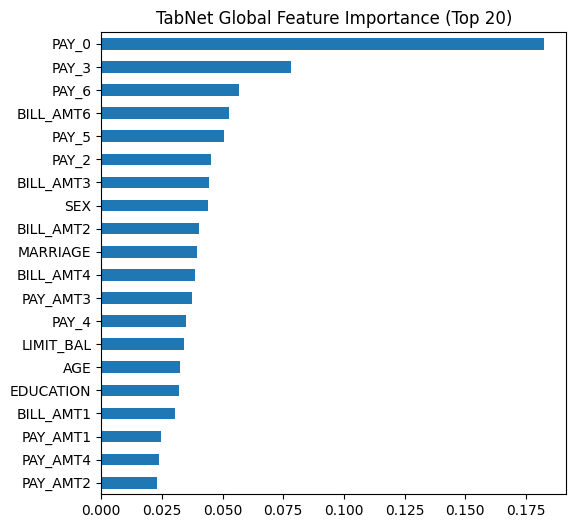

Reason codes for sample #0 (Top-10):


BILL_AMT2    3.157757
PAY_0        2.219489
PAY_3        1.142945
PAY_5        1.016971
PAY_AMT3     0.791869
BILL_AMT3    0.642514
AGE          0.468951
PAY_AMT1     0.336812
PAY_4        0.302055
PAY_2        0.289520
dtype: float64

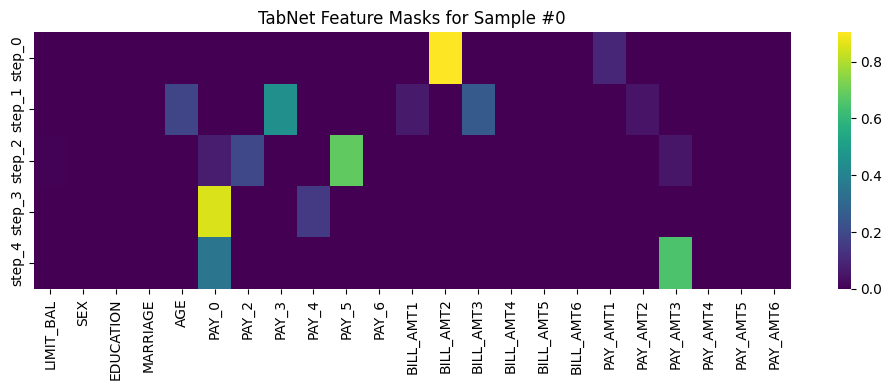

In [189]:
# TabNet Interpretability (Global Importance + Single-sample Top-K Reason Codes + Decision Step Heatmap)

import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

# Get explanations from TabNet
# Compatible with both DataFrame and ndarray inputs
Xv_np = X_valid.values if hasattr(X_valid, "values") else X_valid
M_explain, masks = clf.explain(Xv_np)   # M_explain: (N, F); masks: may vary by implementation version

# Normalize masks to shape (N, steps, F)
def normalize_masks(m):
    if isinstance(m, list):                     # list[step_mask] -> (N, steps, F)
        return np.stack(m, axis=1)
    if isinstance(m, dict):                     # dict: look for common keys or sort by step index
        for k in ["masks", "step_masks", "attentive_masks"]:
            if k in m:
                v = m[k]
                return np.stack(v, axis=1) if isinstance(v, list) else v
        if all(hasattr(v, "shape") for v in m.values()):
            ordered = [m[k] for k in sorted(m.keys())]
            return np.stack(ordered, axis=1)
    if isinstance(m, np.ndarray):               # already ndarray
        return m if m.ndim == 3 else m[None, ...]
    raise TypeError(f"Unsupported masks type: {type(m)}")

mask_stack = normalize_masks(masks)             # (N, steps, F)

print("M_explain shape:", getattr(M_explain, "shape", None))
print("mask_stack shape:", getattr(mask_stack, "shape", None))

# Global feature importance (Top 20)
fi_tabnet = pd.Series(clf.feature_importances_, index=X_df.columns).sort_values(ascending=False)
display(fi_tabnet.head(20))
ax = fi_tabnet.head(20).iloc[::-1].plot(
    kind="barh", figsize=(6,6),
    title="TabNet Global Feature Importance (Top 20)"
)
plt.show()

# Single-sample Top-K reason codes
K = 10
sample_idx = 0  # change this index to visualize a different sample
per_sample_imp = pd.Series(M_explain[sample_idx], index=X_df.columns).sort_values(ascending=False)
print(f"Reason codes for sample #{sample_idx} (Top-{K}):")
display(per_sample_imp.head(K))

# Decision step heatmap (features used at each step for this sample)
n_steps = mask_stack.shape[1]
plt.figure(figsize=(10, 4))
sns.heatmap(
    mask_stack[sample_idx],
    cmap="viridis",
    xticklabels=X_df.columns,
    yticklabels=[f"step_{i}" for i in range(n_steps)]
)
plt.xticks(rotation=90)
plt.title(f"TabNet Feature Masks for Sample #{sample_idx}")
plt.tight_layout()
plt.show()


# Conclusion

(1) Tree-based Models

RandomForest, AdaBoost, CatBoost, XGBoost, and LightGBM models were tested sequentially.
XGBoost achieved an AUC of 0.77, establishing a strong benchmark for credit default classification.

(2) TabNet Model

TabNet achieved AUC=0.75 (valid) and KS=0.35 (test), showing slightly lower accuracy but higher interpretability.
Its attention masks revealed repayment history and bill amounts as key default indicators.

(3) Overall Conclusion

While gradient-boosted trees remain superior in raw predictive performance, TabNet provides a balanced trade-off between accuracy and interpretability, making it ideal for risk management systems where explainability is essential.